<a href="https://colab.research.google.com/github/ecordeiro/data_science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Bruxelas*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Bruxelas, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/belgium/bru/brussels/2021-07-13/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* **id**: Identificador do Imóvel a ser alugado
* **name**: Descrição do Imóvel a ser alugado
* **host_id**: Identificador do Host. Um host poderá ter mais de um imóvel para ser alugado.
* **host_name**: Nome do host.
* **neighbourhood_group**: Todos os valores estão nulos.
* **neighbourhood**: Nome dos bairros dos imóveis
* **latitude**: Valor da latitude do imóvel
* **longitude**: Valor da longitude do imóvel
* **room_type**: Tipo de Imóvel ('Entire home/apt', 'Hotel room', 'Private room', 'Shared room')

 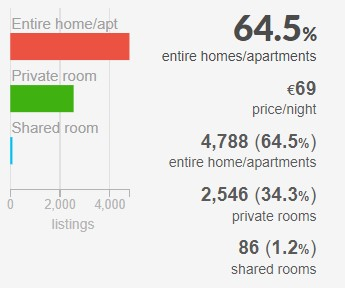

* **price**: Preço da diária do Imóvel
* **minimum_nights**: Mínimo de noites para aluguel
* **number_of_reviews**: número de comentários de clientes que alugaram anteriormente
* **last_review**: data do último comentário
* **reviews_per_month**: % do número de comentários em relação ao número de locações realizadas por mês.
* **calculated_host_listings_count**: Número de imoveis do Host
* **availability_365**: Quantidade de diárias disponíveis durante o ano.

 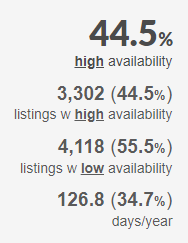



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,NaN,Molenbeek-Saint-Jean,50.85702,4.30771,Entire home/apt,90,2,16,2017-06-30,0.19,2,264
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,NaN,Molenbeek-Saint-Jean,50.85709,4.30757,Entire home/apt,74,2,2,2018-10-28,0.03,2,363
2,45145,B&B Welcome to my place - 2,199370,Erick,NaN,Bruxelles,50.85182,4.36809,Hotel room,91,1,3,2010-11-06,0.11,2,338
3,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.83771,4.40707,Entire home/apt,200,2,0,NaN,NaN,1,365
4,52796,Bright apartment in Ixelles/Louise,244722,Pierre,NaN,Ixelles,50.83362,4.36057,Entire home/apt,74,5,105,2020-02-28,1.00,1,285


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print(df.shape)

# verificar as 5 primeiras entradas do dataset
df.head()

(5718, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,NaN,Molenbeek-Saint-Jean,50.85702,4.30771,Entire home/apt,90,2,16,2017-06-30,0.19,2,264
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,NaN,Molenbeek-Saint-Jean,50.85709,4.30757,Entire home/apt,74,2,2,2018-10-28,0.03,2,363
2,45145,B&B Welcome to my place - 2,199370,Erick,NaN,Bruxelles,50.85182,4.36809,Hotel room,91,1,3,2010-11-06,0.11,2,338
3,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.83771,4.40707,Entire home/apt,200,2,0,NaN,NaN,1,365
4,52796,Bright apartment in Ixelles/Louise,244722,Pierre,NaN,Ixelles,50.83362,4.36057,Entire home/apt,74,5,105,2020-02-28,1.00,1,285


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.197622
last_review                       0.197622
host_name                         0.000350
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

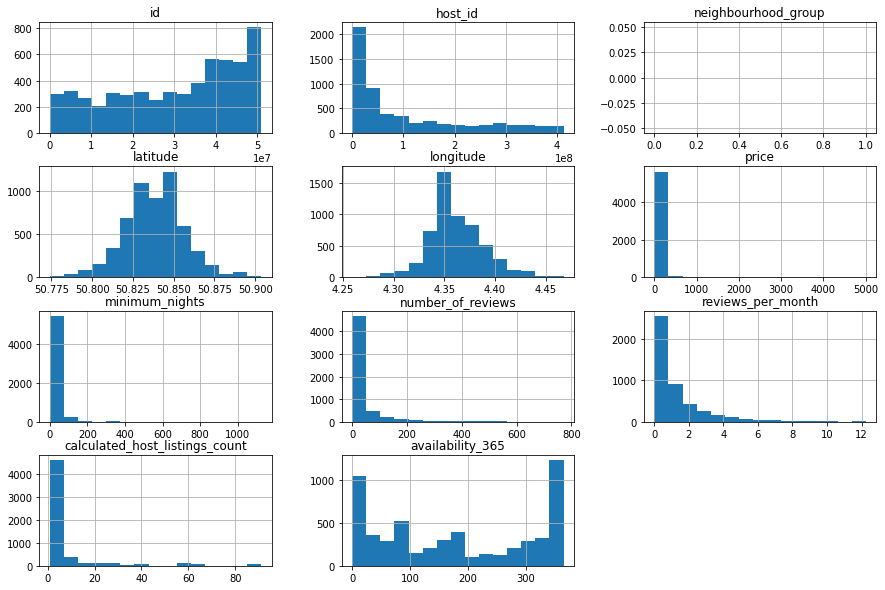

In [ ]:
df.hist(bins=15, figsize=(15,10));

Analisando as distribuições aciama, percebemos duas distribuições próximas a **distribuição normal** nas colunas **latitude e longitude**.

Ja nas colunas **price, minimum_nights, number_of_reviews, reviews_per_month e calculated_host_listings_count**, é possível perceber uma grande possibilidade da presença de **outliers**.

As colunas **id e host_id**, por se tratarem de identificadores não necessitam de análise, assim como a coluna **neighbourhood_group**, onde não existem dados válidos.

Na coluna **availability_365**, será necessário uma avaliação mais aprofundada, ja que não foi possível identificar uma distribuição nem outros tipos de padrão.



### **Análise de Outliers**

In [ ]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.718000e+03,5.718000e+03,0.0,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,4588.000000,5718.000000,5718.000000
mean,3.033152e+07,1.056474e+08,NaN,50.838571,4.361439,83.652151,10.054215,33.890171,1.244477,7.185729,180.273872
std,1.542586e+07,1.180736e+08,NaN,0.018555,0.027471,144.053468,37.243069,67.936768,1.553920,15.618846,135.466496
min,2.352000e+03,2.582000e+03,NaN,50.774130,4.258890,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.746350e+07,1.709387e+07,NaN,50.826930,4.345105,43.000000,1.000000,1.000000,0.230000,1.000000,49.000000
50%,3.384563e+07,4.609152e+07,NaN,50.838401,4.356425,60.000000,2.000000,7.000000,0.660000,1.000000,169.000000
75%,4.384281e+07,1.722988e+08,NaN,50.849720,4.377543,89.000000,4.000000,33.000000,1.610000,4.000000,327.000000
max,5.099906e+07,4.123949e+08,NaN,50.903680,4.467680,5000.000000,1125.000000,771.000000,12.240000,91.000000,365.000000


Confirmando a análise anterior, percebe uma diferença significativa nas variáveis **price, minimum_ninghts, number_of_reviews e calculated_host_listings_count.**

Importante realizarmos a exclusão dos outliers nestes casos para evitar problemas de viés na criação do modelo.

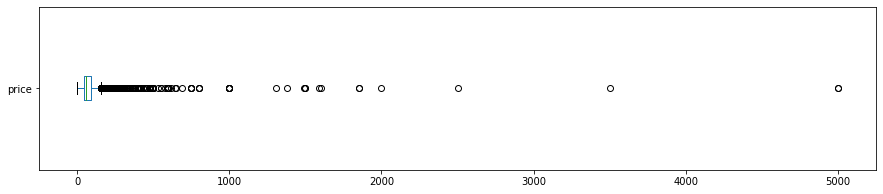

price: valores acima de 1000:
14 entradas
0.2448%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("price: valores acima de 1000:")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df.price.mean()

83.65215110178384

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação

# mostrar a matriz de correlação


In [ ]:
# plotar um heatmap a partir das correlações


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média


In [ ]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

## Conclusões
